In [1]:
import numpy as np
import pandas as pd

from quantifilib.data.data_loader import YahooFinanceLoader

loader = YahooFinanceLoader()
data = loader.load(
    '^GSPC',
    start = '2000-01-01',
    interval = '1d',
    auto_adjust = False,
    multi_level_index = False,
    progress = False
)

### Bollinger Band

In [18]:
from quantifilib.strategy.price_based.mean_reversion import BollingerBandLabeling

bollinger = BollingerBandLabeling(
    data = data,
    upper_multiplier = 2,
    lower_multiplier = 2,
    window = 20,
    method = 'sma',
    price_col_name = 'Close'
)

<Axes: >

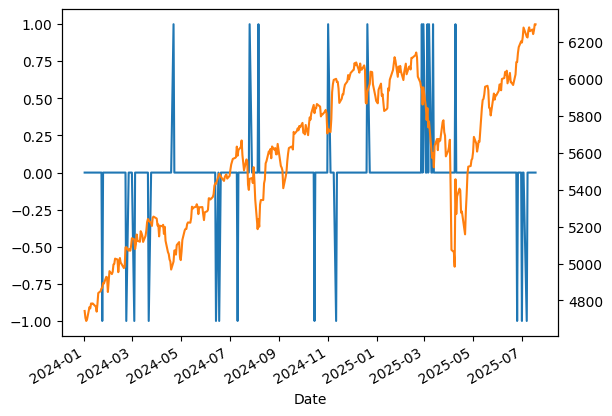

In [19]:
bollinger.get_labels().loc['2024':].plot()
data.loc['2024':,'Close'].plot(secondary_y=True)

### RSI

In [20]:
from quantifilib.strategy.price_based.mean_reversion import RSILabeling

rsi = RSILabeling(
    data = data,
    window = 14,
    upper_threshold = 70,
    lower_threshold = 30,
)

In [22]:
rsi_label = rsi.get_labels()

<Axes: >

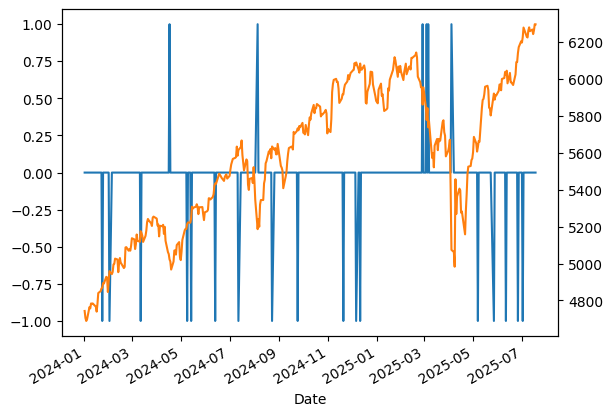

In [23]:
rsi_label.loc['2024':].plot()
data.loc['2024':,'Close'].plot(secondary_y=True)

### Moving Average

In [24]:
from quantifilib.strategy.price_based.momentum import MovingAverageLabeling

moving_average = MovingAverageLabeling(
    data = data,
    long_window = 60,
    short_window = 20,
)
moving_average_label = moving_average.get_labels()

<Axes: >

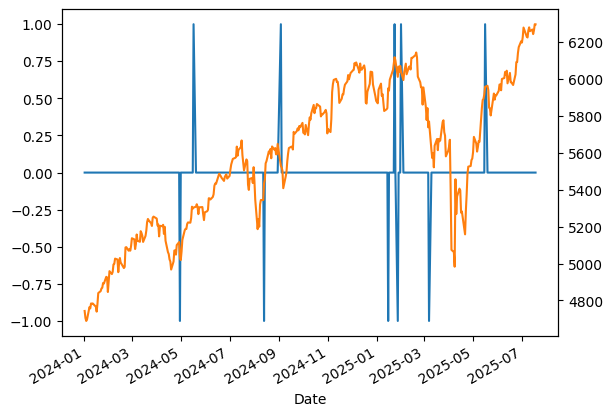

In [25]:
moving_average_label.loc['2024':].plot()
data.loc['2024':,'Close'].plot(secondary_y=True)